20. Условная оптимизация. Метод штрафных функций

Рассмотрим один из многочисленных вариантов метода штрафных функций. Задача условной оптимизации f(x)→min при ограничениях g1(x)=0,…,gm(x)=0,h1(x)≤0,…,hp(x)≤0 решается при помощи решения последовательности вспомогательных задач безусловной оптимизации: (F(x)+c∑i=1mg(hi)2+c∑k=1p[h(hk)]2+)→min, где c – некоторая возрастающая последовательность (например, геометрическая прогрессия), [α]+=max{0,α} .

Для выполнения работы подключим необходимые библиотеки:

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.optimize import minimize

Определим функцию:

In [53]:
def rz(x):
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

Определим ограничения:

In [54]:
def h_1(x):
    return x[0] - 2 * x[1] + 2

def h_2(x):
    return -x[0] - 2 * x[1] + 6

def h_3(x):
    return -x[0] + 2 * x[1] + 2

Главный принцип метода штрафных функций заключается в преобразовании задачи, где требуется минимизировать функцию с ограничениями. Ограничения были добавлены ранее. Для достижения цели требуется следующая функция:

In [55]:
def curr_func(x, r):
    return rz(x) + r * (1.0 / (h_1(x) ** 2 + h_2(x) ** 2 + h_3(x) ** 2))

В методе, мы используем функцию Розенброка вместе с ограничениями. Реализация происходит через цикл с 1000 итерациями. Для выхода из цикла необходимо задать точность eps. Когда алгоритм достигнет указанной точности, программа завершится и выведет результат. Кроме того, для расчета глобального минимума мы можем обратиться к функции Scipy.optimize.minimize. У данной функции уже есть встроенные методы для условной оптимизации, однако известно, что не существует универсального способа, который бы решал все задачи данного типа.

In [56]:
x_c = [1.1, 1.1]
i = 1
r = 1
b = 0.5
eps = 0.0001

while i < 1000:
    x_c = minimize(lambda x: curr_func(x, r), x_c).x
    i += 1
    r *= b
    if curr_func(x_c, r) < eps:
        break

Для реализации метода Розенброка используется ранее введенная функция. Для поиска глобального минимума мы воспользуемся функцией minimize() с аргументами: rz - функция 1 и x_0 - массив вещественных элементов определенного размера.

Минимум графика 1  = [0.9999468223765606, 0.9998935310663829] 
Итераций работы программы -  11 
Минимум графика 2  = [1.0002939184914186, 1.0005643187284174] 


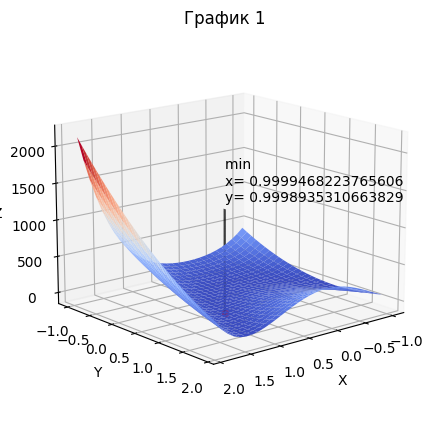

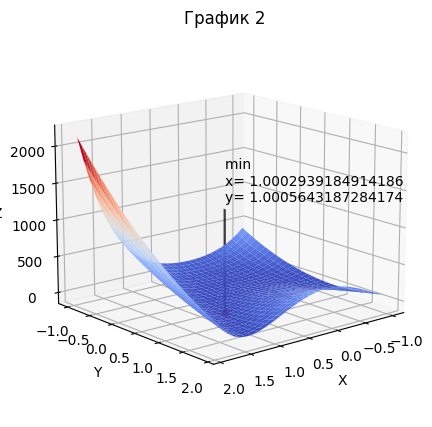

In [57]:
fig = plt.figure(figsize=[6, 5])
X = np.arange(-1, 2, 0.1)
Y = np.arange(-1, 2, 0.1)
X, Y = np.meshgrid(X, Y)

Z_f_1 = curr_func(np.array([X, Y]), r)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(list(x_c)[0], list(x_c)[1], 20, color='red', marker='o')
ax.text(list(x_c)[0], list(x_c)[1], 1500, "min \nx= {}\ny= {}".format(list(x_c)[0], list(x_c)[1]), size=10,
        zorder=1, color='k')
ax.quiver(1, 1, np.linspace(1400, 0, 500), 1, 1, 0, length=0.005, normalize=False, color='black')
surf = ax.plot_surface(X, Y, Z_f_1, cmap=cm.coolwarm)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(15, 50)
plt.title('График 1')
print('Минимум графика 1  = {} '.format(list(x_c)))
print("Итераций работы программы -  {} ".format(i))

x0 = [1.1, 1.1]
constraints = ({'type': 'ineq', 'fun': h_1},
               {'type': 'ineq', 'fun': h_2},
               {'type': 'ineq', 'fun': h_3})
x_1 = minimize(rz, x0, constraints=constraints).x
print('Минимум графика 2  = {} '.format(list(x_1)))
fig = plt.figure(figsize=[6, 5])
X = np.arange(-1, 2, 0.1)
Y = np.arange(-1, 2, 0.1)
X, Y = np.meshgrid(X, Y)

Z_f_1 = rz(np.array([X, Y]))
ax = fig.add_subplot(111, projection='3d')

Z_f_1 = rz(np.array([X, Y]))
ax.scatter(list(x_1)[0], list(x_1)[1], 20, color='red', marker='o')
ax.text(list(x_1)[0], list(x_1)[1], 1500, "min \nx= {}\ny= {}".format(list(x_1)[0], list(x_1)[1]), size=10, zorder=1, color='k')
ax.quiver(1, 1, np.linspace(1400, 0, 500), 1, 1, 0, length=0.005, normalize=False, color='black')
surf = ax.plot_surface(X, Y, Z_f_1, cmap=cm.coolwarm)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(15, 50)
plt.title('График 2')
plt.show()

Подобно первому случаю, мы также определяем константы, ограничения (несколько измененные под новый вид графика) и функцию Розенброка, которая зависит от двух переменных.

Найденный минимум: [1.0000413  1.00008274]
Итераций работы программы: 20


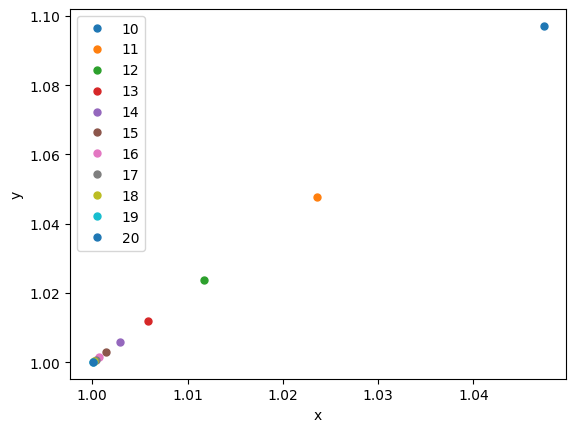

In [58]:
x_d = [1, 1]
i = 1
eps = 0.0001
r = 1
b = 0.5

v_1 = lambda x: (-x[0] + 5)
v_2 = lambda x: (-x[1] + 5)

roz = lambda x: ((1-x[0])**2) + 100*(x[1] - x[0]**2)**2
func = lambda x: roz(x) + r*(v_1(x)**2 + v_2(x)**2)

while i < 1000:
    if(i >= 10):
        mpl.plot(x_d[0], x_d[1], 'o', markersize=5, label=i)
    if r*(max(0, v_1(x_d))**2 + max(0, v_2(x_d))**2) < eps:
        break
    func = lambda x: roz(x) + r*(v_1(x)**2 + v_2(x)**2)
    x_d = minimize(func, x_d).x;
    i += 1
    r  *= b;

print("Найденный минимум: " + str(x_d))
print("Итераций работы программы: " + str(i))
mpl.xlabel('x')
mpl.ylabel('y')
mpl.legend()
pass

Найдем минимум трехмерной функции Розенброка

Найденный минимум - [  3.6946168   13.65100131 186.35161619]
Итераций работы программы - 10


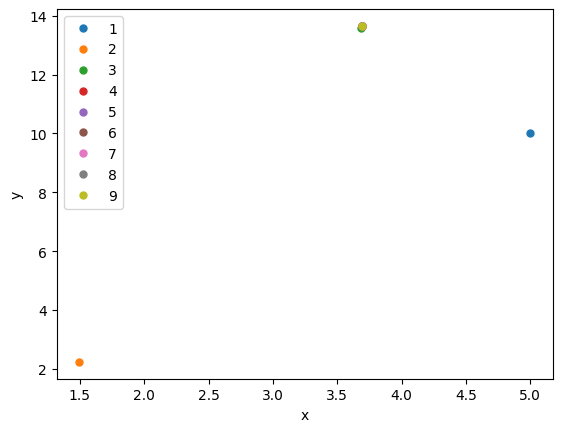

In [59]:
x_d = [5, 10, 15]
i = 1
eps = 0.01
r = 0.001
b = 200

v_1 = lambda x: (x[0]**2 + 10)
v_2 = lambda x: (x[0]**2 + x[1]**2 - 200)
v_3 = lambda x: (x[2]**2 - 33)

roz = lambda x: (1-x[0])**2 + 100*(x[1] - x[0]**2)**2 + (1-x[1])**2 + 100*(x[2] - x[1]**2)**2
func = lambda x: roz(x) + r*(v_1(x)**2 + v_2(x)**2 + v_3(x)**2)

while i < 10:
    if(i >= 0):
        mpl.plot(x_d[0], x_d[1], 'o', markersize=5, label=i)
    if r*(max(0, v_1(x_d))**2 + max(0, v_2(x_d))**2 + max(0, v_3(x_d))**2) < eps:
        break
    func = lambda x: roz(x) + r*(min(0, v_1(x))**2 + min(0, v_2(x))**2 + min(0, v_3(x))**2)
    x_d = minimize(func, x_d).x;
    i += 1
    r  *= b;

print("Найденный минимум - " + str(x_d))
print("Итераций работы программы - " + str(i))

mpl.xlabel('x')
mpl.ylabel('y')
mpl.legend()

pass

Вывод:

С использованием функций, которые вычисляют минимум для функций без ограничений (реализованных в SciPy), можно найти минимальное значение функции с учетом ограничений, используя метод штрафных функций.

Основной идеей метода заключается в том, что мы вычисляем значение функции F(x) = f(x) + P(x), где:
 f(x) - целевая функция, для которой мы хотим вычислить минимум.
 P(x) - штрафная функция, которая существенно увеличивает значение F(x), если оно выходит за пределы ограничений.

Таким образом, минимальное значение функции F(x) достигается, когда f(x) минимально и не нарушает ограничения (что и требуется нам).